### HW2 Solution ###

In [288]:
# Import required modules

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn

# warning library
import warnings
warnings.simplefilter("ignore")

In [289]:
# Read in the train and test datasets into a Pandas DataFrame

train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')
train.head()

,x1,x2
0,-0.426805,-0.538380
1,-0.965742,-0.331686
2,0.273106,0.188718
3,-1.646928,-1.449253
4,0.304448,0.598405


In [290]:
test.head()

,x1,x2
0,0,-2
1,-2,1


array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>]], dtype=object)

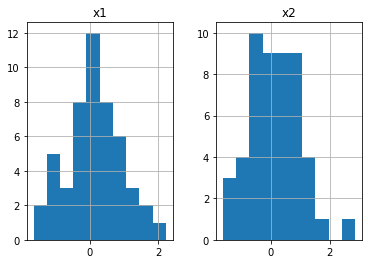

In [291]:
# Plot a simple Histogram to check if data looks somewhat gaussian

train.hist()

#### <u>Case 1: Where the 2 features are independent</u> ####
In this case we can calculate the individual pdf's and then multiply them to get total pdf.

In [292]:
# Create a copy of X and X_test

train_copy = train
test_copy = test


In [293]:
test.head()


,x1,x2
0,0,-2
1,-2,1


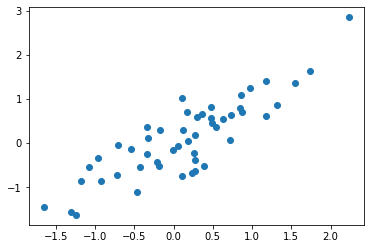

In [294]:
# Plot and visualize the data

plt.scatter(train_copy.x1,train_copy.x2)

Above, there seems to be a linear relationship between the two features.

In [295]:
# Write a function to calulcate indiviudal feature pdf's and return a total pdf

# function for calculating probability density function
# input will be mean and std of each feature column

def pdf(x,mean,std):
    pd = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    pdtot = pd['x1']*pd['x2']
    return pdtot


In [296]:
# Calculate the parameters required to estimate the probability density factors - mean and std

# First calculate mean and std for each feature list

train_mean = train_copy.mean()
print(train_mean)
train_std = train_copy.std()
print('')
print(train_std)


x1    0.142955
x2    0.123187
dtype: float64

x1    0.817407
x2    0.871748
dtype: float64


In [297]:
# Call the function, calculate pdf's and add it to a column in the dataframe you are working with 

pdf_total = pdf(train_copy,train_mean,train_std)
type(pdf_total)

pandas.core.series.Series

In [298]:
# adding series to dataframe

train_copy['pdf_total'] = pdf_total
train_copy.head()

,x1,x2,pdf_total
0,-0.426805,-0.538380,0.131349
1,-0.965742,-0.331686,0.077693
2,0.273106,0.188718,0.219917
3,-1.646928,-1.449253,0.003993
4,0.304448,0.598405,0.188793


In [299]:
# Pick an 'eps' value which does not detect any anomalies in the train set

max_pdf = train_copy['pdf_total'].max()
min_pdf = train_copy['pdf_total'].min()
print(max_pdf,min_pdf)

# assume pdf < eps means anomaly // 

# to prevent anomaly, eps must be slightly smaller than smalles pdf_value

eps = 6.24e-05
# if none of the pdf values are anomalies

0.22240563317885917 6.242751926437464e-05


In [300]:
# Get the total pdf value for the test set and it to the test dataframe

test_mean = test_copy.mean()
print(test_mean)
test_std = test_copy.std()
print('')
print(test_std)



x1   -1.0
x2   -0.5
dtype: float64

x1    1.414214
x2    2.121320
dtype: float64


In [301]:
pdf_test = pdf(test_copy,test_mean,test_std)

test_copy['pdf_test'] = pdf_test
test_copy.head()

,x1,x2,pdf_test
0,0,-2,0.032177
1,-2,1,0.032177


In [302]:
# Detect the anomalies in the test set with the same eps
# Change it if requred till the 2 anomalies are detected and the misclassification in the train set is as minimum as possible

# eps from above was 6.24e-05
# in order to detect anomaly, value must be at least 0.0322
eps = 0.0322

for i in test_copy['pdf_test']:
    if i<eps:
        print(f"{i},is an anomaly")


df_bv_anomalies = train_copy[train_copy['pdf_total']< eps]
print(f"The anomalous points\n{df_bv_anomalies}")

0.032177450876684645,is an anomaly
0.032177450876684645,is an anomaly
The anomalous points
          x1        x2  pdf_total
3  -1.646928 -1.449253   0.003993
7   1.732585  1.642965   0.007375
10 -1.303140 -1.548977   0.007420
22  1.542242  1.356557   0.018966
37  2.228768  2.859645   0.000062
41 -1.244211 -1.625102   0.007084


[-6.  -5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5
  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]


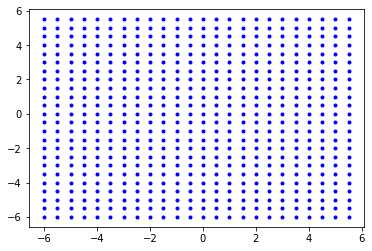

In [303]:
# Prepare data for visualizing on a contour plot
# Create a meshgrid

x = np.arange(-6,6,0.5) 
y = np.arange(-6,6,0.5)
print(x)

Xl, Yl = np.meshgrid(x, y)
Xl.shape,Yl.shape

plt.plot(Xl,Yl, marker='.', color='b', linestyle='none')
plt.show()

#### Preparing the data for the Contour plots ####

1. We have to compute the pdf(Z) values for every data point in the meshgrid.

2. We can do the above by putting all the data points Xl and Yl in 2 columns and then computing pdf like we did before.

3. We then have to reshape Z to the same shape as the meshgrid.

In [304]:
# Flatten and convert the Xl and Yl points to a numpy arrary with 2 columns
# np.dstack Stacks arrays in sequence depth wise

print(Xl.flatten().shape)
array = np.dstack((Xl.flatten(),Yl.flatten())).reshape(-1,2)

# Put the array into a pandas dataframe

array = pd.DataFrame(array,columns=['x1','x2'])

# Compute total pdf and reshape Z

Z = pdf(array,train_mean,train_std)
Z = np.array(Z).reshape(Xl.shape)

print(Z.shape)
print(f"Shape of Z:{Z.shape}\n\nValues of Z{Z}")

(576,)
(24, 24)
Shape of Z:(24, 24)

Values of Z[[2.35279901e-24 1.93539942e-22 1.09511183e-20 4.26234330e-19
  1.14114404e-17 2.10152517e-16 2.66213953e-15 2.31968556e-14
  1.39036719e-13 5.73234068e-13 1.62568561e-12 3.17134303e-12
  4.25551343e-12 3.92792149e-12 2.49388096e-12 1.08915761e-12
  3.27195880e-13 6.76125027e-14 9.61055095e-15 9.39661962e-16
  6.31970922e-17 2.92364497e-18 9.30366916e-20 2.03650730e-21]
 [1.12148502e-22 9.22527360e-21 5.21995934e-19 2.03168827e-17
  5.43937643e-16 1.00171285e-14 1.26893525e-13 1.10570116e-12
  6.62732335e-12 2.73237713e-11 7.74899198e-11 1.51165216e-10
  2.02843275e-10 1.87228280e-10 1.18873313e-10 5.19157793e-11
  1.55961167e-11 3.22281711e-12 4.58096458e-13 4.47899209e-14
  3.01235218e-15 1.39358442e-16 4.43468633e-18 9.70721437e-20]
 [3.84708499e-21 3.16459078e-19 1.79062821e-17 6.96939977e-16
  1.86589593e-14 3.43622464e-13 4.35289072e-12 3.79294085e-11
  2.27340318e-10 9.37300707e-10 2.65817466e-09 5.18549442e-09
  6.95823219e-09 6.4

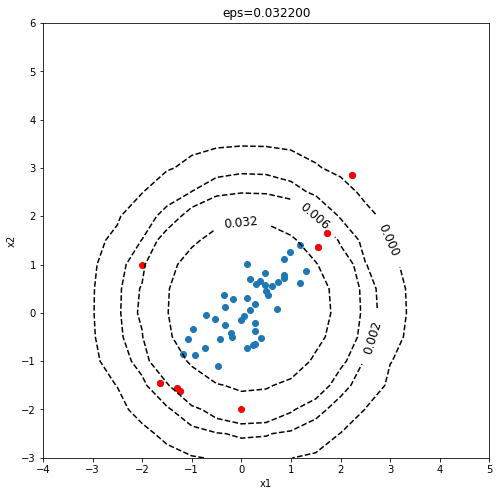

In [305]:
# Visualize normal data, all anomlaies using Contour plots
# Mark anomalies in red

plt.figure(figsize=(8,8))
plt.title(f"eps=%f" % eps)
plt.scatter(train_copy['x1'],train_copy['x2'])
plt.scatter(test_copy['x1'],test_copy['x2'],c='r')
plt.scatter(df_bv_anomalies['x1'],df_bv_anomalies['x2'],c='r')
levels = [0,0.0002,0.002,0.006, 0.032]
CS = plt.contour(Xl,Yl,Z,levels,linestyles='dashed',colors='black')
plt.clabel(CS, inline=True, fontsize=12)
plt.xlim(-4,5)
plt.ylim(-3,6)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()



### Contour  Analysis (Independent Features)

In the contour plot above, about 6 other train data points besides the test data got classified as being anomalies.

The reason for this issue is most likely due to the probability density function being calculated on independent features.
Since the variables were treated as independent, the pdf will center around the largest cluster of data that is close in geometric distance to each other. As a result, the contour lines will form to be more circular and will leave out points that are as clustered towards the center of majority

-------------------------

### Case for multi-variate data with orientation ###

Formula for multi-variate  $ p(x:\mu,\Sigma) = \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}e^-(-\frac{1}{2}(X-\mu)^T\Sigma^-1(X-\mu)) $

##### Repeat the same process but this time assuming there is covariance in the data ####

In [306]:
train_mv = pd.read_csv('train.csv')

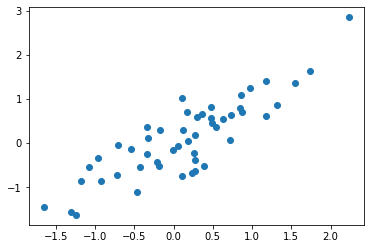

In [307]:
plt.scatter(train_mv.x1,train_mv.x2)
plt.show()

In [308]:
train_mv_mean = train_mv.mean()
train_mv_cov = train_mv.cov()

print(train_mv_mean,'\n',train_mv_cov)

x1    0.142955
x2    0.123187
dtype: float64 
           x1        x2
x1  0.668154  0.610888
x2  0.610888  0.759945


In [309]:
from scipy.stats import multivariate_normal

# use multivariate formula for calculating px values
train_px = multivariate_normal.pdf(train_mv, train_mv_mean,train_mv_cov) 

# Add column to train_mv
train_mv['px'] = train_px

print(train_mv.head())

         x1        x2        px
0 -0.426805 -0.538380  0.323973
1 -0.965742 -0.331686  0.079653
2  0.273106  0.188718  0.425352
3 -1.646928 -1.449253  0.039060
4  0.304448  0.598405  0.325971


In [310]:
# Again check for smallest and largest values to assume eps

max_px = train_mv['px'].max()
min_px = train_mv['px'].min()
print(max_px,min_px)

# assume pdf < eps means anomaly // 

# to prevent anomaly, eps must be slightly smaller than smallest pdf_value

eps_mv = 0.00303
# if none of the pdf values are anomalies

0.42535185017605254 0.0030320905723394353


In [311]:
# calculate px for test

test_mv = pd.read_csv('test.csv')
test_mv_mean = test_mv.mean()
test_mv_cov = test_mv.cov()

print(test_mv_mean,'\n',test_mv_cov)

x1   -1.0
x2   -0.5
dtype: float64 
      x1   x2
x1  2.0 -3.0
x2 -3.0  4.5


In [312]:
# Use same meshgrid from above, just change pdf function to multivariate function to calculate new z values

        # Flatten and convert the Xl and Yl points to a numpy arrary with 2 columns
        # np.dstack Stacks arrays in sequence depth wise

print(Xl.flatten().shape)
array = np.dstack((Xl.flatten(),Yl.flatten())).reshape(-1,2)

        # Put the array into a pandas dataframe

array = pd.DataFrame(array,columns=['x1','x2'])

        # Compute total pdf and reshape Z

Z = multivariate_normal.pdf(array,train_mv_mean,train_mv_cov)
Z = np.array(Z).reshape(Xl.shape)

print(Z.shape)
print(f"Shape of Z:{Z.shape}\n\nValues of Z{Z}")

(576,)
(24, 24)
Shape of Z:(24, 24)

Values of Z[[1.24879537e-013 1.93589826e-012 7.31417970e-012 6.73504605e-012
  1.51149724e-012 8.26734376e-014 1.10208852e-015 3.58062475e-018
  2.83526063e-021 5.47165884e-025 2.57357531e-029 2.95016699e-034
  8.24229517e-040 5.61230900e-046 9.31379838e-053 3.76707214e-060
  3.71340988e-068 8.92141386e-077 5.22379748e-086 7.45471120e-096
  2.59278892e-106 2.19783633e-117 4.54062232e-129 2.28626864e-141]
 [2.36198818e-013 1.13899190e-011 1.33861411e-010 3.83426398e-010
  2.67670473e-010 4.55418607e-011 1.88848231e-012 1.90856484e-014
  4.70102719e-017 2.82208736e-020 4.12895350e-024 1.47231717e-028
  1.27954218e-033 2.71018967e-039 1.39906087e-045 1.76021364e-052
  5.39741736e-060 4.03365237e-068 7.34687717e-077 3.26136149e-086
  3.52847418e-096 9.30393776e-107 5.97913688e-118 9.36487623e-130]
 [1.29125269e-013 1.93689387e-011 7.08096185e-010 6.30914534e-009
  1.37006337e-008 7.25107884e-009 9.35311867e-010 2.94037085e-011
  2.25288810e-013 4.206965

In [313]:
test_mv = pd.read_csv('test.csv')
test_mv_mean = test_mv.mean()
test_mv_cov = test_mv.cov()

print(test_mv_mean)
print(' ')
print(test_mv_cov)

x1   -1.0
x2   -0.5
dtype: float64
 
     x1   x2
x1  2.0 -3.0
x2 -3.0  4.5


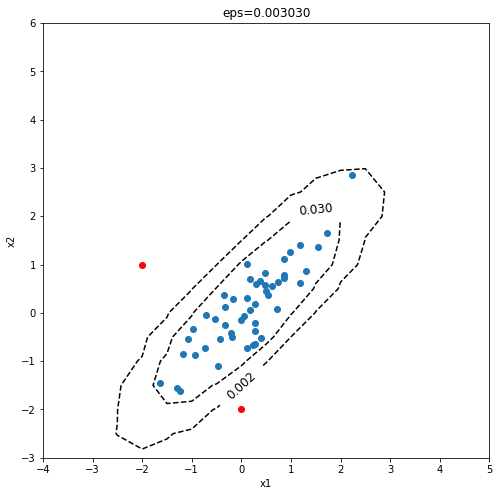

In [314]:
# Visualize data with multivariate pdf function,

plt.figure(figsize=(8,8))
plt.title(f"eps=%f" % eps_mv)
plt.scatter(train_mv['x1'],train_mv['x2'])
plt.scatter(test_mv['x1'],test_mv['x2'],c='r')
levels = [0, 0.002, 0.0303]
CS = plt.contour(Xl,Yl,Z,levels,linestyles='dashed',colors='black')
plt.clabel(CS, inline=True, fontsize=12)
plt.xlim(-4,5)
plt.ylim(-3,6)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


### Contour  Analysis (Dependent Features)

In the above contour plot, the original eps of 0.03 misclassified one of the training data as an anamoly. However, by decreasing the eps to 0.002, all the train data was classified properly as normal and the test data was makred as anomalies.

This countour plot performed better than the previous one since the features were treated as dependent. The distinction of the data having dependent features instead of independent features is important because the original scatter plot of the data shows that X1 and X2 have a linear correlation with each other. 

By taking the dependency of features into consideration, the probability density function can more accurately represent what belongs as normal data.

As shown in the contour plot, the contour lines more accurately fit the shape of the data and included all the necessary points.

### Coding Reflection Paragraph

The main takeaway I took from this project was the large importance of analyzing how feature data relates with each other. As shown with the contour plots, a small distinction between related or unrelated features can result in either a massive increase or loss in predictive power. The contour plots were cool to learn because they help visualize how density pdfs can 2-dimensionally separate data.

The main challenge I had while doing this homework was conceptually remembering how to use epsilon to classify anomalies and how epsilon was represented on the contour graphs. At first, I was confused as how to set epsilon in regards to the pdf values, but I eventually remembered that values below epsilon indicated anomalies.

Other than some conceptual issues, the coding only became frustrating gwhen I would mix up variable names or mess up the dimensions or array size of the mesh grid. 

The homework was very useful in practicing anomaly detection and visualizing the actual process.